In [1]:
import matplotlib.patches as mpatches
import numpy as np
import os
import math
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
params = {
   'axes.labelsize': 12,
   'font.size': 12,
   'legend.fontsize': 11,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
   'figure.figsize': [10, 2] # instead of 4.5, 4.5
   }
plt.rcParams.update(params)

## helper function

In [23]:
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        plt.axes().text(rect.get_x()+rect.get_width()/2., height+0.01, '{:2.3f}'.format(float(height)).lstrip('0'),
                ha='center', va='bottom',fontsize=12)

## Plotting Parameter

In [24]:
nfeature = 50
model = 'multi_srm'
exp = 'loo_ds'
roi_all = ['dmn','pt','eac']
# loo_ds_all = [0,0,1,1,1,2,2,3,3,3] 
# other_ds_all = [[1,3],[3,1],[0,2,3],[0,3,2],[3,0,2],[0,1,3],[0,3,1],[0,1,2],[0,2,1],[1,0,2]]
loo_ds_all = ['d0','d3','d1']
# other_ds_all = [[1,3],[1,0,2],[0,3,2]]
other_ds_all = [['d1:d0','d1,d3:d0'],['d1:d3','d1,d0:d3'],['d0:d1','d0,d3:d1']]

assert(len(loo_ds_all)==len(other_ds_all))
max_accu = 0.25
exp_label = 'Leave-one-out Time Segment Matching'

input_file = '../../output/accu_bar/{exp}/{model}/nfeat{nfeature}/{roi}.npz'
output_path = '../../output/figures/{exp}/'
output_file = output_path+'{model}_nfeat{nfeature}_{roi}'
if not os.path.exists(output_path.format(exp=exp)):
    os.makedirs(output_path.format(exp=exp))

## Plot all roi

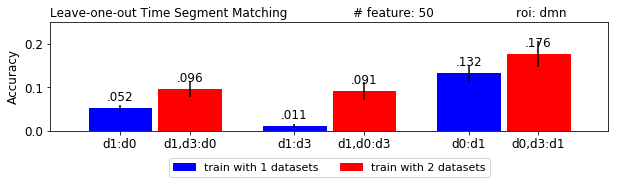

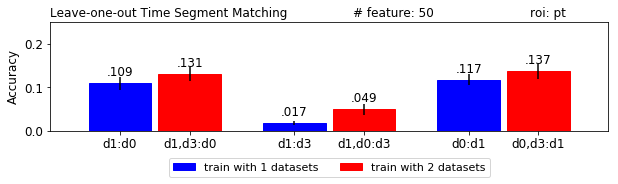

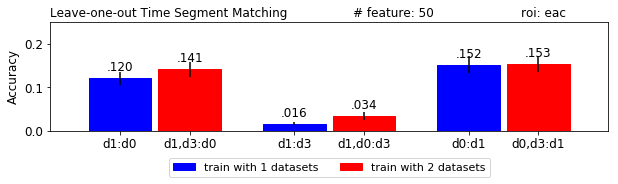

In [25]:
width=1
ngroup = len(loo_ds_all)
group_width = []
for grp_idx in range(ngroup):
    group_width.append(1.25*width*len(other_ds_all[grp_idx]))
group_width = np.array(group_width,dtype=np.float32)
center_all = np.insert(np.cumsum(group_width),0,0)[:-1]
color_all = 'brgcmyk'
idx_all = [0]
for i in range(ngroup):
    idx_all.append(idx_all[-1]+len(other_ds_all[i]))

for roi in roi_all:
#     xtick_idx = []
#     xtick_name = []
    xtick_minor_idx = []
    xtick_minor_name = []
    ws= np.load(input_file.format(exp=exp,model=model,nfeature=nfeature,roi=roi))
    keep = [0,1,2,3,5,6]
    all_mean = ws['accu_mean'][keep]
    all_se = ws['accu_se'][keep]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    for i,(name, name_minor,center) in enumerate(zip(loo_ds_all,other_ds_all,center_all)):
        mean = list(all_mean[idx_all[i]:idx_all[i+1]])
        se   = list(all_se[idx_all[i]:idx_all[i+1]])    
        idx = np.arange(center,center+len(name_minor)*width,width)   
        error_config = {'ecolor': '0'}   
        rects = plt.bar(idx, mean, yerr=se, align='center', error_kw=error_config, width =  width-0.1)
        for rect_i in range(len(rects)):
            rects[rect_i].set_color(color_all[rect_i])
        autolabel(rects)
#         xtick_idx.append(center+(len(name_minor)-1)*width/2)
#         xtick_name.append(name)
        xtick_minor_idx.extend(idx)
        xtick_minor_name.extend(name_minor)

#     ax.set_xticks(xtick_idx)
#     ax.set_xticklabels(xtick_name)
#     for t in ax.get_xticklabels():
#         t.set_y(-0.1)
#     ax.set_xticks(xtick_minor_idx,minor=True)
#     ax.set_xticklabels(xtick_minor_name,minor=True)
    ax.set_xticks(xtick_minor_idx)
    ax.set_xticklabels(xtick_minor_name)
    
    ax.set_ylabel('Accuracy')
    left_lim = center_all[0]-0.5*width-0.5
    right_lim = center_all[-1]+(len(other_ds_all[-1])-0.5)*width+0.5
    ax.set_xlim([left_lim,right_lim])
    ax.set_ylim([0,max_accu])
    legend_handle = []
    for patch_i in range(2):
        legend_handle.append(mpatches.Patch(color=color_all[patch_i], label='train with '+str(patch_i+1)+' datasets'))
    ax.legend(handles=legend_handle,loc=9, bbox_to_anchor=(0.5, -0.2),ncol=2)
    ax.text(left_lim, 1.02*max_accu, exp_label, horizontalalignment='left', verticalalignment='bottom')
    ax.text(1.5*(right_lim+left_lim)/2, 1.02*max_accu, '# feature: '+str(nfeature), horizontalalignment='right', verticalalignment='bottom')
    ax.text(right_lim-0.6*width, 1.02*max_accu, 'roi: '+roi, horizontalalignment='right', verticalalignment='bottom')
#     plt.savefig(output_file.format(exp=exp,model=model,nfeature=nfeature,roi=roi)+'.eps', format='eps', dpi=200,bbox_inches='tight')
    plt.savefig(output_file.format(exp=exp,model=model,nfeature=nfeature,roi=roi)+'.pdf', format='pdf', dpi=200,bbox_inches='tight')